In [ ]:
!pip3 install wordcloud

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import chardet
with open('spam.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

In [3]:
df = pd.read_csv('spam.csv',encoding= 'Windows-1252')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3266,ham,Ok then i come n pick u at engin?,NaN,NaN,NaN
1628,ham,Yes princess! I want to make you happy...,NaN,NaN,NaN
4440,ham,I'm going 2 orchard now laready me reaching so...,NaN,NaN,NaN
3777,ham,Once a fishrman woke early in d mrng. It was v...,NaN,NaN,NaN
2304,ham,Friendship poem: Dear O Dear U R Not Near But ...,NaN,NaN,NaN


In [4]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [6]:
df.duplicated().sum()

403

In [7]:
df = df.drop_duplicates()

In [8]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df['target'] = df['target'].apply(lambda x : 0 if x =='ham' else 1)
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.shape

(5169, 2)

In [11]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

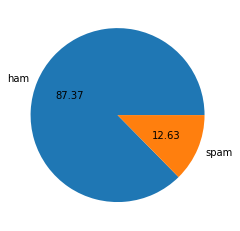

In [12]:
plt.pie(df['target'].value_counts(),labels = ['ham','spam'],autopct = "%0.2f")
plt.show()

In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/anup/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
df['num_of_letters']   = df['text'].apply(len)
df['num_of_words']     = df['text'].apply(lambda x : nltk.word_tokenize(x)).apply(len)
df['num_of_sentences'] = df['text'].apply(lambda x : nltk.sent_tokenize(x)).apply(len)

In [15]:
df.head()

,target,text,num_of_letters,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [16]:
df[df['target'] == 0][['num_of_letters','num_of_words','num_of_sentences']].describe()

,num_of_letters,num_of_words,num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [17]:
df[df['target'] == 1][['num_of_letters','num_of_words','num_of_sentences']].describe()

,num_of_letters,num_of_words,num_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<AxesSubplot:xlabel='num_of_words', ylabel='Count'>

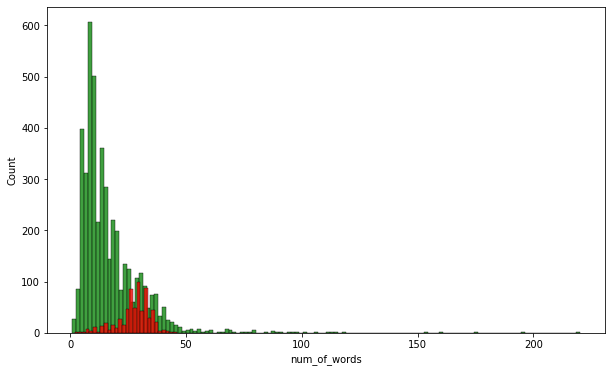

In [18]:
plt.figure(figsize = (10,6))
sns.histplot(df[df['target'] == 0]['num_of_words'],color='green')
sns.histplot(df[df['target'] == 1]['num_of_words'],color='red')

## Data / Text Preprocessing

 1. Lowercase
 2. Tokenization
 3. Removing special chars
 4. Removing stop words and punctuations
 5. Stemming

In [19]:
df.head()

,target,text,num_of_letters,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [20]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

print(nltk.download('punkt'))
print(nltk.download('stopwords'))
print('Stopwords in English :',stopwords.words('english'))
print('Punctuations in English :',string.punctuation)
ps = PorterStemmer()

True
True
Stopwords in English : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only

[nltk_data] Downloading package punkt to /home/anup/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/anup/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
def convert_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    x =[]
    
    for i in text:
        if i.isalnum() and i not in stopwords.words('english') and i not in string.punctuation:
            x.append(i)
            
    text = x[:]
    x.clear()
    
    for i in text:
        x.append(ps.stem(i))
    
    return " ".join(x)

In [22]:
convert_text('Hi Subbu...How are you ?I am dancing and Singing bro')

'hi subbu danc sing bro'

In [23]:
df['converted_text'] = df['text'].apply(convert_text)

In [24]:
df.head()

,target,text,num_of_letters,num_of_words,num_of_sentences,converted_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


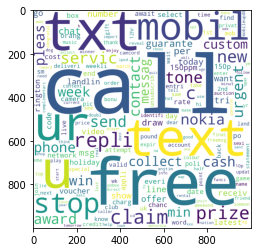

In [25]:
# We will use word cloud for most frequent words

from wordcloud import WordCloud

wc = WordCloud(width = 1000, height = 1000, min_font_size = 10, background_color = 'white',collocations=False)
spam_wc = wc.generate(df[df['target'] == 1]['converted_text'].str.cat(sep = " "))
plt.imshow(spam_wc)

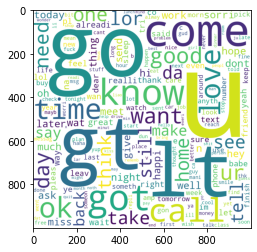

In [26]:
ham_wc = wc.generate(df[df['target'] == 0]['converted_text'].str.cat(sep = " "))
plt.imshow(ham_wc)

In [27]:
df['converted_text_num_of_words']  = df['converted_text'].apply(lambda x : nltk.word_tokenize(x)).apply(len)

In [28]:
spam_words = []
for word in df[df['target'] == 1]['converted_text']:
    for msg in word.split():
        spam_words.append(msg)
    

In [29]:
len(spam_words)

9939

In [30]:
ham_words = []
for word in df[df['target'] == 0]['converted_text']:
    for msg in word.split():
        ham_words.append(msg)
    

In [31]:
len(ham_words)

35394

In [32]:
from collections import Counter
pd.DataFrame(Counter(spam_words).most_common(50)).head(20)

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [33]:
from collections import Counter
pd.DataFrame(Counter(ham_words).most_common(50)).head(20)

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


### Model Building

In [34]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv   = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [35]:
X = tfidf.fit_transform(df['converted_text']).toarray()
X.shape

(5169, 3000)

In [36]:
Y = df['target'].values

In [37]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state = 10)

In [39]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

In [40]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [41]:
gnb.fit(X_train,Y_train)
Y_pred1 = gnb.predict(X_test)


print(accuracy_score(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))

0.8530549110595514
0.44932432432432434
[[970 163]
 [ 27 133]]


In [42]:
mnb.fit(X_train,Y_train)
Y_pred2 = mnb.predict(X_test)


print(accuracy_score(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))

0.9621036349574633
0.9911504424778761
[[1132    1]
 [  48  112]]


In [43]:
bnb.fit(X_train,Y_train)
Y_pred3 = bnb.predict(X_test)


print(accuracy_score(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))

0.9752513534416086
1.0
[[1133    0]
 [  32  128]]


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

/usr/local/lib/python3.8/dist-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [45]:
lr  = LogisticRegression(solver='liblinear', penalty='l1')
dt  = DecisionTreeClassifier(max_depth=5)
rf  = RandomForestClassifier(n_estimators=50, random_state=2)
svc = SVC(kernel='sigmoid', gamma=1.0)
knn = KNeighborsClassifier()
mnb = MultinomialNB()
ab = AdaBoostClassifier(n_estimators=50, random_state=2)
gb = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [46]:
clfs = {
    'SVC' : svc,
    'KNN' : knn, 
    'Naive Bayes': mnb, 
    'Decision Tree': dt, 
    'Logistic Regression': lr, 
    'Random Forest': rf, 
    'AdaBoost': ab, 
    'Gradient Boost':gb,
    'XG Boost':xgb
}

In [47]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [48]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,Y_train,X_test,Y_test)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [49]:
algos_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
algos_df

,Algorithm,Accuracy,Precision
1,KNN,0.905646,1.000000
2,Naive Bayes,0.962104,0.991150
0,SVC,0.969838,0.984000
5,Random Forest,0.966744,0.983471
4,Logistic Regression,0.953596,0.980769
7,Gradient Boost,0.943542,0.967742
8,XG Boost,0.965197,0.938931
6,AdaBoost,0.955916,0.899225
3,Decision Tree,0.927301,0.811321


In [50]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))